In [1]:
%load_ext watermark
%watermark

Last updated: 2021-05-06T12:55:31.016895-05:00

Python implementation: CPython
Python version       : 3.7.6
IPython version      : 7.12.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 

import pandas as pd 
import numpy as np
from sklearn import datasets

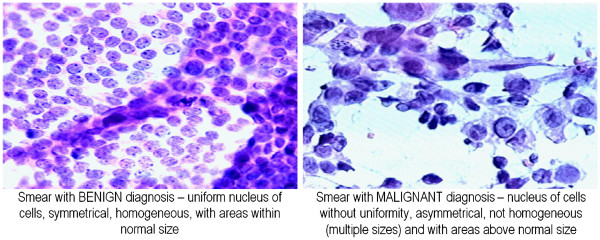

In [4]:
from IPython.display import Image

Image("media/breast_cancer.jpeg")

In [5]:
cancer_datos = datasets.load_breast_cancer()

cancer_df = pd.DataFrame(cancer_datos["data"],
                           columns=cancer_datos["feature_names"]
                          )

cancer_df["objetivo"] = cancer_datos.target
cancer_df["objetivo"] = cancer_df["objetivo"].replace({0:1, 1:0})

In [6]:
cancer_df["objetivo"].value_counts(True)

0    0.627417
1    0.372583
Name: objetivo, dtype: float64

In [7]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,objetivo
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [10]:
X = cancer_df[cancer_datos.feature_names]
y = cancer_df["objetivo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
modelo = LogisticRegression()

modelo.fit(X_train, y_train)

predicciones = modelo.predict(X_test)
clases_reales = y_test
predicciones_probabilidades = modelo.predict_proba(X_test)

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
def tupla_clase_prediccion(y_real, y_pred):
    return list(zip(y_real, y_pred))

tupla_clase_prediccion(clases_reales, predicciones)[:10]

[(0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0)]

Cuatro tipos de observaciones 
true positives 
false positives
true negatives 
false negatives 

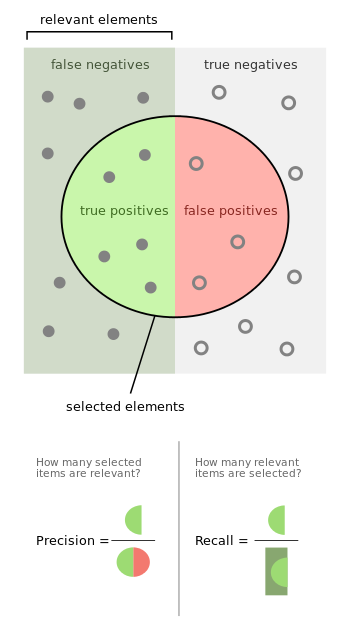

In [23]:
Image("media/imagen.png")

In [24]:

def VP(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==1 and obs[1]==1])

def VN(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==0 and obs[1]==0])
    
def FP(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==0 and obs[1]==1])

def FN(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==1 and obs[1]==0])


print("""
Verdaderos Positivos: {}
Verdaderos Negativos: {}
Falsos Positivos: {}
Falsos Negativos: {}
""".format(
    VP(clases_reales, predicciones),
    VN(clases_reales, predicciones),
    FP(clases_reales, predicciones),
    FN(clases_reales, predicciones)    
))


Verdaderos Positivos: 59
Verdaderos Negativos: 107
Falsos Positivos: 1
Falsos Negativos: 4



Ratios de clasificación
Exactitud (Accuracy)

La exactitud es una medida general de como se comporta el modelo, mide simplemente el porcentaje de casos que se han clasificado correctamente.

In [25]:
def exactitud(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    vn = VN(clases_reales, predicciones)
    return (vp+vn) / len(clases_reales)

exactitud(clases_reales, predicciones)

0.9707602339181286

In [26]:
from sklearn import metrics
metrics.accuracy_score(clases_reales, predicciones)

0.9707602339181286

Precisión (Precission)

La precisión indica la habilidad del modelo para clasificar como positivos los casos que son positivos.

In [27]:
def precision(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    fp = FP(clases_reales, predicciones)
    return vp / (vp+fp)

precision(clases_reales, predicciones)

0.9833333333333333

In [28]:
metrics.average_precision_score(clases_reales, predicciones)

0.944291283764968

Exhaustividad o sensibilidad(Recall o True Positive Rate)

La sensibilidad nos da una medida de la habilidad del modelo para encontrar todos los casos positivos. La sensibilidad se mide en función de una clase.



In [30]:
def sensibilidad(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    fn = FN(clases_reales, predicciones)
    return vp / (vp+fn)

sensibilidad(clases_reales, predicciones)

0.9365079365079365

In [31]:
metrics.recall_score(clases_reales, predicciones)

0.9365079365079365

Matriz de confusion

La matriz de confusión es una forma muy sencilla de comparar como ha clasificado cada observación el modelo.

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(clases_reales, predicciones)

array([[107,   1],
       [  4,  59]], dtype=int64)

Puntuación F1 (F1 score)

La puntuación F1 es una media ponderada entre la sensibilidad (que intenta obtener cuantos mas verdaderos positivos independientemente de los falsos positivos) y la precisión (que intenta obtener solo verdaderos positivos que sean casos claros para limitar los falsos positivos).

La puntuación F1 se define como la media harmónica de la precisión y la sensibilidad:

In [34]:
def puntuacion_f1(clases_reales, predicciones):
    precision_preds = precision(clases_reales, predicciones)
    sensibilidad_preds = sensibilidad(clases_reales, predicciones)
    return 2*(precision_preds*sensibilidad_preds)/(precision_preds+sensibilidad_preds)

puntuacion_f1(clases_reales, predicciones)

0.9593495934959351

In [35]:
metrics.f1_score(clases_reales, predicciones)

0.9593495934959351

In [36]:
def fpr(clases_reales, predicciones):
    return (FP(clases_reales, predicciones) / (
             FP(clases_reales, predicciones) + VN(clases_reales, predicciones)
             )
           )
fpr(clases_reales, predicciones)

0.009259259259259259

¿Cómo clasifica un modelo?

Un modelo como la regresión lineal funciona prediciendo distancias a una "linea de decision" que se convierten en probabilidades para cada clase. Pero a la hora de la verdad al modelo le suele interesar sólo saber que clase predice el modelo. En general esto se hace decidiendo un umbral (threshold) y clasificando los casos con menor probabilidad como clase negativa y mayor probabilidad como clase positiva.

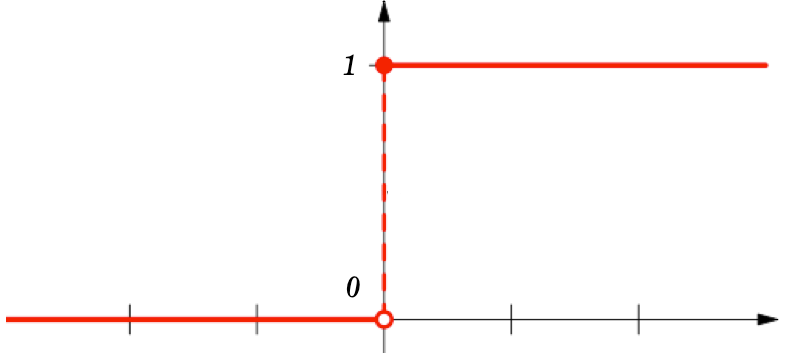

In [39]:
Image("media/threshold.png")

In [40]:
df = pd.DataFrame({"clase_real":clases_reales,
                   "clase_pred": predicciones,
                   "probabilidades_0":modelo.predict_proba(X_test)[:,0],
                    "probabilidades_1":modelo.predict_proba(X_test)[:,1],
                  })
df["sum_probas"] = df.probabilidades_0 + df.probabilidades_1

In [41]:
df.sample(10)

,clase_real,clase_pred,probabilidades_0,probabilidades_1,sum_probas
393,1,1,1.059301e-08,1.000000,1.0
86,1,1,4.057405e-01,0.594260,1.0
446,1,1,1.776852e-05,0.999982,1.0
434,0,0,9.943518e-01,0.005648,1.0
310,0,0,9.959306e-01,0.004069,1.0
503,1,1,0.000000e+00,1.000000,1.0
275,0,0,9.971951e-01,0.002805,1.0
322,0,0,9.801670e-01,0.019833,1.0
163,0,0,9.905377e-01,0.009462,1.0
396,0,0,9.435757e-01,0.056424,1.0


Como el modelo no tiene ningún motivo para elegir un umbral determinado (sólo sabe probabilidades) elige 0.5 por defecto.

In [44]:
df.query("probabilidades_1>0.5 & clase_pred==0")

,clase_real,clase_pred,probabilidades_0,probabilidades_1,sum_probas


In [45]:
df.query("probabilidades_0>0.5 & clase_pred==1")

,clase_real,clase_pred,probabilidades_0,probabilidades_1,sum_probas


In [46]:
def probabilidades_a_clases(predicciones_probabilidades, umbral=0.5):
    predicciones = np.zeros([len(predicciones_probabilidades), ])
    predicciones[predicciones_probabilidades[:,1]>=umbral] = 1
    return predicciones

In [47]:
predicciones_probabilidades[:10]

array([[8.70591400e-01, 1.29408600e-01],
       [5.17698173e-09, 9.99999995e-01],
       [6.84140570e-03, 9.93158594e-01],
       [9.96548386e-01, 3.45161387e-03],
       [9.98625864e-01, 1.37413624e-03],
       [5.76616310e-10, 9.99999999e-01],
       [9.87876447e-13, 1.00000000e+00],
       [4.47111851e-03, 9.95528881e-01],
       [9.96017558e-01, 3.98244193e-03],
       [9.80830300e-01, 1.91697004e-02]])

In [48]:
probabilidades_a_clases(predicciones_probabilidades, umbral=0.90)[:10]

array([0., 1., 1., 0., 0., 1., 1., 1., 0., 0.])

In [49]:
from ipywidgets import widgets, fixed, interact
@interact(umbral=widgets.FloatSlider(min=0.01, max=0.99, step=0.01, value=0.01))
def evaluar_umbral(umbral):
    predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, umbral)
    sensibilidad_umbral = metrics.recall_score(clases_reales, predicciones_en_umbral)
    fpr_umbral = fpr(clases_reales, predicciones_en_umbral)
    precision_umbral = precision(clases_reales, predicciones_en_umbral) 
    print( """
    Precision: {:.3f}
    Sensibilidad:{:.3f}
    Ratio de Alarma: {:.3f}
    """.format(
        precision_umbral,
        sensibilidad_umbral,
        fpr_umbral
    ))

interactive(children=(FloatSlider(value=0.01, description='umbral', max=0.99, min=0.01, step=0.01), Output()),…

In [50]:
def evaluar_umbral(umbral):
    predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, umbral)
    precision_umbral = precision(clases_reales, predicciones_en_umbral)
    sensibilidad_umbral = metrics.recall_score(clases_reales, predicciones_en_umbral)
    fpr_umbral = fpr(clases_reales, predicciones_en_umbral)
    return precision_umbral, sensibilidad_umbral, fpr_umbral


rango_umbral = np.linspace(0., 1., 1000)
sensibilidad_umbrales = []
precision_umbrales = []
fpr_umbrales = []

for umbral in rango_umbral:
    precision_umbral, sensibilidad_umbral, fpr_umbral = evaluar_umbral(umbral)
    precision_umbrales.append(precision_umbral)
    sensibilidad_umbrales.append(sensibilidad_umbral)
    fpr_umbrales.append(fpr_umbral)

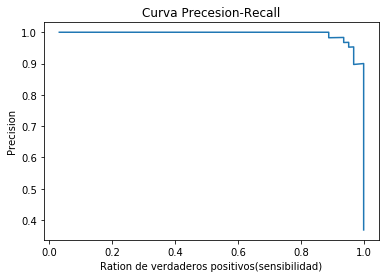

In [51]:
plt.plot(sensibilidad_umbrales, precision_umbrales);
plt.ylabel("Precision")
plt.xlabel("Ration de verdaderos positivos(sensibilidad)")
plt.title("Curva Precesion-Recall");

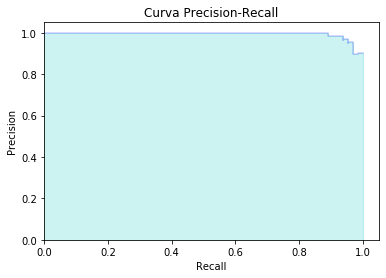

In [56]:
def grafica_precision_recall(clases_reales, predicciones_probabilidades):
    precision_, recall_, _ = metrics.precision_recall_curve(
        clases_reales, predicciones_probabilidades[:,1])

    plt.step(recall_, precision_, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall_, precision_, step='post', alpha=0.2,
                 color='c')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.05])
    plt.title('Curva Precision-Recall');
    plt.show()


grafica_precision_recall(clases_reales, predicciones_probabilidades)

Area bajo la curva (Area Under the Curve, ROC-AUC)

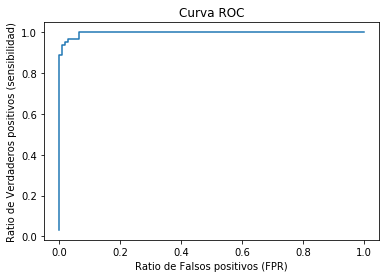

In [57]:
plt.plot(fpr_umbrales, sensibilidad_umbrales);
plt.xlabel("Ratio de Falsos positivos (FPR)")
plt.ylabel("Ratio de Verdaderos positivos (sensibilidad)")
plt.title("Curva ROC");

In [58]:
metrics.roc_auc_score(clases_reales, predicciones)

0.9636243386243386

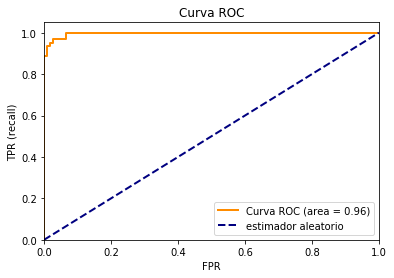

In [59]:
def grafica_curva_auc(clases_reales, predicciones, predicciones_probabilidades):
    fpr, tpr, _ = metrics.roc_curve(clases_reales, predicciones_probabilidades[:,1])
    roc_auc = metrics.roc_auc_score(clases_reales, predicciones)
    plt.figure()

    plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="estimador aleatorio")
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR (recall)')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show();

grafica_curva_auc(clases_reales, predicciones, predicciones_probabilidades)

In [60]:
def evaluar_modelo(clases_reales, predicciones, probabilidades):
    exactitud = metrics.accuracy_score(clases_reales, predicciones)
    precision = metrics.average_precision_score(clases_reales, predicciones)
    sensibilidad = metrics.recall_score(clases_reales, predicciones)
    roc_auc = metrics.roc_auc_score(clases_reales, predicciones)
    f1 = metrics.f1_score(clases_reales, predicciones)
    print("""
    Exactitud: {:.3f}
    Precisión: {:.3f}
    Sensibilidad: {:.3f}
    Area bajo curva (AUC): {:.3f}
    Puntuación F1: {:.3f}
    """.format(
        exactitud, 
        precision,
        sensibilidad,
        roc_auc,
        f1
    ))
    
evaluar_modelo(clases_reales, predicciones, predicciones_probabilidades)


    Exactitud: 0.971
    Precisión: 0.944
    Sensibilidad: 0.937
    Area bajo curva (AUC): 0.964
    Puntuación F1: 0.959
    


In [61]:
cancer_df.objetivo.value_counts(True)

0    0.627417
1    0.372583
Name: objetivo, dtype: float64

### Evaluación de dataset imbalanceado

In [62]:
creditos_df = pd.read_csv("data/datos_creditos.csv")

In [63]:
creditos_df.head()

,impago_en_2_anos,deuda_credito,edad,n_veces_pagos_retrasados_30_59_dias,ratio_deuda_mensual_salario,salario,n_lineas_credito_y_prestamos,n_veces_pagos_retrasados_90_dias,n_hipotecas,n_veces_pagos_retrasados_60_89_dias,numero_personas_dependientes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [64]:
variable_objetivo = "impago_en_2_anos"

In [65]:
X = creditos_df.drop(variable_objetivo, axis=1)
y = creditos_df[variable_objetivo]

X_train_credito, X_test_credito, y_train_credito, y_test_credito = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [66]:
y.value_counts(normalize=True)

0    0.93316
1    0.06684
Name: impago_en_2_anos, dtype: float64

In [67]:
modelo = LogisticRegression()

modelo.fit(X_train_credito, y_train_credito)

predicciones_creditos = modelo.predict(X_test_credito)
clases_reales_creditos = y_test_credito
predicciones_probabilidades_creditos = modelo.predict_proba(X_test_credito)

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [68]:
evaluar_modelo(clases_reales_creditos, predicciones_creditos, predicciones_probabilidades_creditos)



    Exactitud: 0.934
    Precisión: 0.072
    Sensibilidad: 0.014
    Area bajo curva (AUC): 0.506
    Puntuación F1: 0.027
    


In [69]:
len(creditos_df[creditos_df[variable_objetivo]==1])

10026

In [70]:
len([pred for pred in predicciones if pred==1])

60

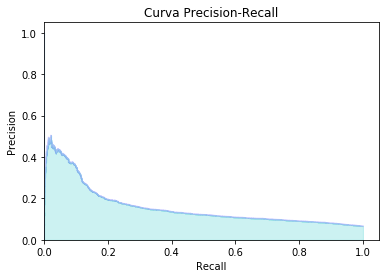

In [71]:

grafica_precision_recall(clases_reales_creditos, predicciones_probabilidades_creditos)

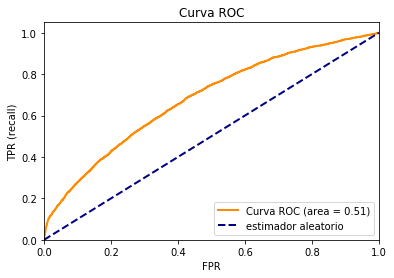

In [72]:
grafica_curva_auc(clases_reales_creditos, predicciones_creditos, predicciones_probabilidades_creditos)

Como decidir un Umbral de decision¶


In [74]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

cancer_datos = datasets.load_breast_cancer()

cancer_df = pd.DataFrame(cancer_datos["data"],
                           columns=cancer_datos["feature_names"]
                          )

cancer_df["objetivo"] = cancer_datos.target
cancer_df["objetivo"] = cancer_df["objetivo"].replace({0:1, 1:0})

In [75]:
X = cancer_df[cancer_datos.feature_names]
y = cancer_df["objetivo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)